In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
tickers = ['PG', 'MSFT', 'F', 'GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6596 entries, 1995-01-03 to 2021-03-15
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6596 non-null   float64
 1   MSFT    6596 non-null   float64
 2   F       6596 non-null   float64
 3   GE      6596 non-null   float64
dtypes: float64(4)
memory usage: 257.7 KB


In [4]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,8.166473,2.389259,4.380183,4.119593
1995-01-04,8.101009,2.406627,4.498034,4.119593
1995-01-05,7.986450,2.366929,4.458752,4.129690
1995-01-06,8.002816,2.406627,4.458752,4.109495
1995-01-09,7.970086,2.391740,4.537320,4.069108


In [5]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2021-03-09,126.180000,233.779999,12.57,14.00
2021-03-10,127.339996,232.419998,12.91,13.25
2021-03-11,126.910004,237.130005,12.81,12.27
2021-03-12,128.139999,235.750000,13.37,12.58
2021-03-15,128.559998,234.809998,13.20,13.35


In [6]:
mydata.iloc[0]

PG      8.166473
MSFT    2.389259
F       4.380183
GE      4.119593
Name: 1995-01-03 00:00:00, dtype: float64

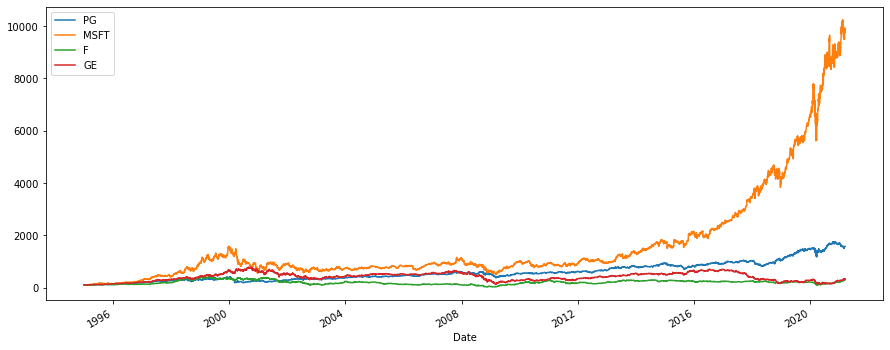

In [7]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

In [8]:
returns = (mydata / mydata.shift(1))-1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026905,0.000000
1995-01-05,-0.014141,-0.016495,-0.008733,0.002451
1995-01-06,0.002049,0.016772,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017621,-0.009828


In [11]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.130030
MSFT    0.223781
F       0.121450
GE      0.096182
dtype: float64

In [17]:
weights_1 = np.array ([0.25, 0.25, 0.25, 0.25])

In [18]:
np.dot(annual_returns, weights_1)

0.14286102167537884

In [19]:
pfolio_1 = str(round(np.dot(annual_returns, weights_1), 4)* 100) + '%'
print (pfolio_1)

14.29%


***

In [ ]:
weights_2 = np.array ([0.4, 0.4, 0.15, 0.05])

In [24]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 4)* 100) + '%'
print (pfolio_1)
print (pfolio_2)

14.29%
16.46%
